In [89]:
import cv2
import numpy
import mss
from matplotlib.pyplot import imshow

from copy import copy

In [90]:
MONITOR = {"top": 284, "left": 0, "width": 770, "height": 500}
BOTTOM_LEFT_WINDOW = {"top": 540, "left": 0, "width": 770, "height": 505}
PICS_DIR = "../pics/"

In [176]:
def get_screenshot(monitor=MONITOR):
    with mss.mss() as screenshot:
        return numpy.array(screenshot.grab(monitor))

def read_image(filename):
    return cv2.imread(PICS_DIR+filename, cv2.IMREAD_COLOR)
    
def show_image(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGB)
    imshow(img)

In [177]:
def get_matches_on_screen(screenshot, image, threshold=0.85):
    result = cv2.matchTemplate(screenshot, image, cv2.TM_CCOEFF_NORMED)
    h, w = image.shape[:2]
    matching_points = numpy.where(result >= threshold)
    all_matches = zip(*matching_points[::-1])

    rect_matches = []
    for top_left_match in list(all_matches):
        bottom_right_match = (top_left_match[0] + w, top_left_match[1] + h)
        rect_matches.append((top_left_match, bottom_right_match))
        
    return rect_matches    
    
def debug_rectangle(image, top_left, bottom_right):
    cv2.rectangle(
        image,
        top_left,
        bottom_right,
        [255, 0, 255],
        2,
    )

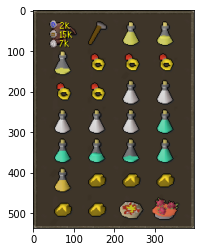

In [178]:
inventory = read_image("example_inventory.png")
show_image(inventory)

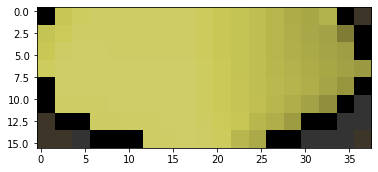

In [179]:
brew = read_image("bottom_of_sara_brew.png")
show_image(brew)

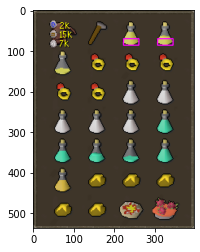

In [180]:
debug_inventory = copy(inventory)
# Lower than .98 matches the defense potion, too.
for match in get_matches_on_screen(inventory, brew, threshold=0.98):
    debug_rectangle(debug_inventory, match[0], match[1])
show_image(debug_inventory)

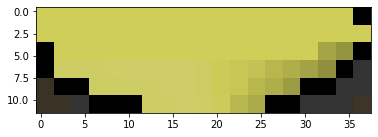

In [181]:
single_dose_brew = read_image("single_dose_sara_brew.png")
show_image(single_dose_brew)

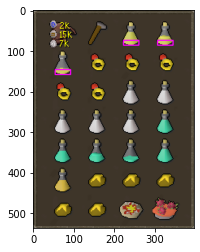

In [182]:
debug_inventory = copy(inventory)
# Lower than .96 matches the defense potion, too.
for match in get_matches_on_screen(inventory, single_dose_brew, threshold=0.96):
    debug_rectangle(debug_inventory, match[0], match[1])
show_image(debug_inventory)